In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Algoritmos de ML
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm

from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

##Leyendo el conjunto de datos

In [3]:
X = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Experimentos/Datos/dataset-threshold.csv')
Y = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Experimentos/Datos/cuatro-categorias.csv')

## Redimencionando las etiquetas

In [4]:
X = np.array(X)
Y = np.array(Y)
Y = Y.reshape(200,)

## Escalando los datos

In [34]:
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

In [35]:
dataframe = pd.DataFrame(X)
dataframe

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## **PERCEPTRON MULTICAPA**

In [48]:
clf = MLPClassifier(hidden_layer_sizes=(1, 1024),
                    solver='adam', 
                    max_iter=512, 
                    random_state=1)

clf.fit(X_train, y_train)

train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
cross_val_train_score = cross_val_score(clf, X_train, y_train, cv=10)
cross_val_test_score = cross_val_score(clf, X_test, y_test, cv=10)

print(f"puntaje de entrenamiento: {train_score}")
print(f"puntaje de prueba: {test_score}")
print(f"puntajes de entrenamiento-validacion cruzada: {cross_val_train_score}")
print(f"puntajes de prueba-validacion cruzada: {cross_val_test_score}")

print(f"Media de los puntajes de entrenamiento-validacion cruzada: {cross_val_train_score.mean()}")
print(f"Media de los puntajes de prueba-validacion cruzada: {cross_val_test_score.mean()}")


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  UserWarning,


puntaje de entrenamiento: 0.9625
puntaje de prueba: 0.35
puntajes de entrenamiento-validacion cruzada: [0.5    0.4375 0.5    0.5625 0.3125 0.25   0.4375 0.1875 0.3125 0.4375]
puntajes de prueba-validacion cruzada: [0.75 0.25 0.25 0.25 0.5  0.   0.25 0.5  0.75 0.25]
Media de los puntajes de entrenamiento-validacion cruzada: 0.39375
Media de los puntajes de prueba-validacion cruzada: 0.375


In [49]:
y_pred = clf.predict(X_test)
matrix_test = confusion_matrix(y_test, y_pred)
print(matrix_test)
print(classification_report(y_test, y_pred))

[[4 2 0 0]
 [7 3 1 4]
 [3 1 5 0]
 [3 5 0 2]]
              precision    recall  f1-score   support

           0       0.24      0.67      0.35         6
           1       0.27      0.20      0.23        15
           2       0.83      0.56      0.67         9
           3       0.33      0.20      0.25        10

    accuracy                           0.35        40
   macro avg       0.42      0.41      0.37        40
weighted avg       0.41      0.35      0.35        40



## **BOSQUES ALEATORIOS**

In [50]:
clf = RandomForestClassifier(n_estimators = 22, 
                             max_depth=5, 
                             random_state = 1, 
                             min_samples_leaf = 1)

clf.fit(X_train, y_train)

train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
cross_val_train_score = cross_val_score(clf, X_train, y_train, cv=10)
cross_val_test_score = cross_val_score(clf, X_test, y_test, cv=10)

print(f"puntaje de entrenamiento: {train_score}")
print(f"puntaje de prueba: {test_score}")
print(f"puntajes de entrenamiento-validacion cruzada: {cross_val_train_score}")
print(f"puntajes de prueba-validacion cruzada: {cross_val_test_score}")

print(f"Media de los puntajes de entrenamiento-validacion cruzada: {cross_val_train_score.mean()}")
print(f"Media de los puntajes de prueba-validacion cruzada: {cross_val_test_score.mean()}")


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  UserWarning,


puntaje de entrenamiento: 0.9875
puntaje de prueba: 0.475
puntajes de entrenamiento-validacion cruzada: [0.6875 0.375  0.4375 0.4375 0.625  0.8125 0.4375 0.625  0.4375 0.625 ]
puntajes de prueba-validacion cruzada: [0.75 0.25 0.25 0.5  0.25 0.5  0.75 0.75 0.5  0.5 ]
Media de los puntajes de entrenamiento-validacion cruzada: 0.55
Media de los puntajes de prueba-validacion cruzada: 0.5


In [51]:
y_pred = clf.predict(X_test)
matrix_test = confusion_matrix(y_test, y_pred)
print(matrix_test)
print(classification_report(y_test, y_pred))

[[4 0 1 1]
 [6 4 1 4]
 [3 0 6 0]
 [1 4 0 5]]
              precision    recall  f1-score   support

           0       0.29      0.67      0.40         6
           1       0.50      0.27      0.35        15
           2       0.75      0.67      0.71         9
           3       0.50      0.50      0.50        10

    accuracy                           0.48        40
   macro avg       0.51      0.53      0.49        40
weighted avg       0.52      0.47      0.47        40



## **REGRESION LOGISTICA**

In [52]:
clf = LogisticRegression(max_iter=1000)

clf.fit(X_train, y_train)

train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
cross_val_train_score = cross_val_score(clf, X_train, y_train, cv=10)
cross_val_test_score = cross_val_score(clf, X_test, y_test, cv=10)

print(f"puntaje de entrenamiento: {train_score}")
print(f"puntaje de prueba: {test_score}")
print(f"puntajes de entrenamiento-validacion cruzada: {cross_val_train_score}")
print(f"puntajes de prueba-validacion cruzada: {cross_val_test_score}")

print(f"Media de los puntajes de entrenamiento-validacion cruzada: {cross_val_train_score.mean()}")
print(f"Media de los puntajes de prueba-validacion cruzada: {cross_val_test_score.mean()}")


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  UserWarning,


puntaje de entrenamiento: 1.0
puntaje de prueba: 0.55
puntajes de entrenamiento-validacion cruzada: [0.375  0.4375 0.5    0.5625 0.5625 0.75   0.5    0.6875 0.5    0.4375]
puntajes de prueba-validacion cruzada: [0.75 0.5  0.5  0.5  0.5  0.5  0.25 0.75 0.75 1.  ]
Media de los puntajes de entrenamiento-validacion cruzada: 0.53125
Media de los puntajes de prueba-validacion cruzada: 0.6


In [53]:
y_pred = clf.predict(X_test)
matrix_test = confusion_matrix(y_test, y_pred)
print(matrix_test)
print(classification_report(y_test, y_pred))

[[2 0 4 0]
 [3 9 1 2]
 [3 0 6 0]
 [4 1 0 5]]
              precision    recall  f1-score   support

           0       0.17      0.33      0.22         6
           1       0.90      0.60      0.72        15
           2       0.55      0.67      0.60         9
           3       0.71      0.50      0.59        10

    accuracy                           0.55        40
   macro avg       0.58      0.53      0.53        40
weighted avg       0.66      0.55      0.59        40



## **MAQUINAS DE SOPORTE VECTORIAL**

In [54]:
clf = svm.SVC()

clf.fit(X_train, y_train)

train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
cross_val_train_score = cross_val_score(clf, X_train, y_train, cv=10)
cross_val_test_score = cross_val_score(clf, X_test, y_test, cv=10)

print(f"puntaje de entrenamiento: {train_score}")
print(f"puntaje de prueba: {test_score}")
print(f"puntajes de entrenamiento-validacion cruzada: {cross_val_train_score}")
print(f"puntajes de prueba-validacion cruzada: {cross_val_test_score}")

print(f"Media de los puntajes de entrenamiento-validacion cruzada: {cross_val_train_score.mean()}")
print(f"Media de los puntajes de prueba-validacion cruzada: {cross_val_test_score.mean()}")


puntaje de entrenamiento: 0.94375
puntaje de prueba: 0.625
puntajes de entrenamiento-validacion cruzada: [0.625  0.5625 0.5    0.625  0.5625 0.8125 0.625  0.5625 0.5    0.5625]
puntajes de prueba-validacion cruzada: [0.5  0.5  0.75 0.75 0.5  0.5  0.25 0.5  0.5  0.25]
Media de los puntajes de entrenamiento-validacion cruzada: 0.59375
Media de los puntajes de prueba-validacion cruzada: 0.5


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  UserWarning,


In [57]:
y_pred = clf.predict(X_test)
matrix_test = confusion_matrix(y_test, y_pred)
print(matrix_test)
print(classification_report(y_test, y_pred))

[[ 5  0  1  0]
 [ 6  4  1  4]
 [ 3  0  6  0]
 [ 0  0  0 10]]
              precision    recall  f1-score   support

           0       0.36      0.83      0.50         6
           1       1.00      0.27      0.42        15
           2       0.75      0.67      0.71         9
           3       0.71      1.00      0.83        10

    accuracy                           0.62        40
   macro avg       0.71      0.69      0.62        40
weighted avg       0.78      0.62      0.60        40



# **Experimento 1 Perceptron multicapa - 4 categorias**

In [ ]:
# Listas para almacenar los resultados de entrenamiento y pruebas
mlp_acuracies_test = []
mlp_acuracies_train = []

kf = KFold(n_splits=10, shuffle=True, random_state=1)

for train_index, test_index in kf.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = Y[train_index], Y[test_index]

  MLP_clf = MLPClassifier(hidden_layer_sizes=(1, 2048) ,solver = 'adam', max_iter=512, random_state=1)
  MLP_clf.fit(X_train, y_train)
  mlp_acuracies_test.append(MLP_clf.score(X_test, y_test))
  mlp_acuracies_train.append(MLP_clf.score(X_train, y_train))

## Resultados de entrenamiento

In [ ]:
print(mlp_acuracies_train)

[0.9388888888888889, 0.9222222222222223, 0.6555555555555556, 0.9666666666666667, 0.2611111111111111, 0.9666666666666667, 0.9611111111111111, 0.9666666666666667, 0.9666666666666667, 0.75]


In [ ]:
y_pred = MLP_clf.predict(X_train)
matrix_train = confusion_matrix(y_train, y_pred)
print(matrix_train)

[[47  0  0  0]
 [ 5 42  0  0]
 [40  0  0  0]
 [ 0  0  0 46]]


In [ ]:
report = classification_report(y_train, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.51      1.00      0.68        47
           1       1.00      0.89      0.94        47
           2       0.00      0.00      0.00        40
           3       1.00      1.00      1.00        46

    accuracy                           0.75       180
   macro avg       0.63      0.72      0.66       180
weighted avg       0.65      0.75      0.68       180



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Resultados de pruebas

In [ ]:
print(mlp_acuracies_test)

[0.45, 0.45, 0.35, 0.4, 0.15, 0.4, 0.3, 0.35, 0.5, 0.35]


In [ ]:
y_pred = MLP_clf.predict(X_test)
matrix_test = confusion_matrix(y_test, y_pred)
print(matrix_test)

[[3 0 0 0]
 [0 3 0 0]
 [8 2 0 0]
 [2 1 0 1]]


In [ ]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.23      1.00      0.38         3
           1       0.50      1.00      0.67         3
           2       0.00      0.00      0.00        10
           3       1.00      0.25      0.40         4

    accuracy                           0.35        20
   macro avg       0.43      0.56      0.36        20
weighted avg       0.31      0.35      0.24        20



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
mlp_acuracies_test = np.array(mlp_acuracies_test)
mlp_acuracies_train = np.array(mlp_acuracies_train)

In [ ]:
rf_acuracies_test = []
rf_acuracies_train = []

In [ ]:
lr_acuracies_test = []
lr_acuracies_train = []

In [ ]:
svm_acuracies_test = []
svm_acuracies_train = []

In [ ]:
kf = KFold(n_splits=10, shuffle=True, random_state=1)

for train_index, test_index in kf.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = Y[train_index], Y[test_index]

  MLP_clf = MLPClassifier(hidden_layer_sizes=(1, 2048), solver = 'adam', max_iter=512, random_state=1)
  RF_clf = RandomForestClassifier(n_estimators = 22, max_depth=5, random_state = 1, min_samples_leaf = 1,)
  LR_clf = LogisticRegression(max_iter=1000)
  SVM_clf = svm.SVC()

  MLP_clf.fit(X_train, y_train)
  RF_clf.fit(X_train, y_train)
  LR_clf.fit(X_train, y_train)
  SVM_clf.fit(X_train, y_train)

  mlp_acuracies_test.append(MLP_clf.score(X_test, y_test))
  mlp_acuracies_train.append(MLP_clf.score(X_train, y_train))

  rf_acuracies_test.append(RF_clf.score(X_test, y_test))
  rf_acuracies_train.append(RF_clf.score(X_train, y_train))

  lr_acuracies_test.append(LR_clf.score(X_test, y_test))
  lr_acuracies_train.append(LR_clf.score(X_train, y_train))

  svm_acuracies_test.append(SVM_clf.score(X_test, y_test))
  svm_acuracies_train.append(SVM_clf.score(X_train, y_train))

In [ ]:
mlp_acuracies_test = np.array(mlp_acuracies_test)
mlp_acuracies_train = np.array(mlp_acuracies_train)

rf_acuracies_test = np.array(rf_acuracies_test)
rf_acuracies_train = np.array(rf_acuracies_train)

lr_acuracies_test = np.array(lr_acuracies_test)
lr_acuracies_train = np.array(lr_acuracies_train)

svm_acuracies_test = np.array(svm_acuracies_test)
svm_acuracies_train = np.array(svm_acuracies_train)

In [ ]:
print('MLP')
print('test')
print(mlp_acuracies_test)
print('train')
print(mlp_acuracies_train)

MLP
test
[0.45 0.45 0.35 0.4  0.15 0.4  0.3  0.35 0.5  0.35]
train
[0.93888889 0.92222222 0.65555556 0.96666667 0.26111111 0.96666667
 0.96111111 0.96666667 0.96666667 0.75      ]


In [ ]:
print('Random Forest')
print('test')
print(rf_acuracies_test)
print('train')
print(rf_acuracies_train)

Random Forest
test
[0.6  0.6  0.5  0.5  0.55 0.5  0.6  0.6  0.4  0.65]
train
[0.99444444 0.99444444 0.98333333 1.         0.99444444 0.99444444
 0.99444444 0.98888889 0.98888889 0.99444444]


In [ ]:
print('Regresion lineal')
print('test')
print(lr_acuracies_test)
print('train')
print(lr_acuracies_train)

Regresion lineal
test
[0.5  0.3  0.45 0.4  0.45 0.65 0.45 0.55 0.35 0.6 ]
train
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
print('SVM')
print('test')
print(svm_acuracies_test)
print('train')
print(svm_acuracies_train)

SVM
test
[0.65 0.55 0.5  0.6  0.75 0.65 0.75 0.6  0.5  0.7 ]
train
[0.96111111 0.94444444 0.95       0.95555556 0.95       0.95
 0.94444444 0.95555556 0.93888889 0.94444444]


In [ ]:
print('MLP')
print('test')
print(mlp_acuracies_test)
print('train')
print(mlp_acuracies_train)
print('------------------------')
print('Random Forest')
print('test')
print(rf_acuracies_test)
print('train')
print(rf_acuracies_train)
print('------------------------')
print('Regresion lineal')
print('test')
print(lr_acuracies_test)
print('train')
print(lr_acuracies_train)
print('------------------------')
print('SVM')
print('test')
print(svm_acuracies_test)
print('train')
print(svm_acuracies_train)

In [ ]:
print('PERCEPTRON MULTICAPA')
print(f'Prueba: {mlp_acuracies_test.mean()}')
print(f'Entrenamiento: {mlp_acuracies_train.mean()}')

print('\nBOSQUES ALEATORIOS')
print(f'Prueba: {rf_acuracies_test.mean()}')
print(f'Entrenamiento: {rf_acuracies_train.mean()}')

print('\nREGRESIÓN LOGÍSTICA')
print(f'Prueba: {lr_acuracies_test.mean()}')
print(f'Entrenamiento: {lr_acuracies_train.mean()}')

print('\nMÁQUINAS DE SOPORTE VECTORIAL')
print(f'Prueba: {svm_acuracies_test.mean()}')
print(f'Entrenamiento: {svm_acuracies_train.mean()}')

PERCEPTRON MULTICAPA
Prueba: 0.37
Entrenamiento: 0.8355555555555556

BOSQUES ALEATORIOS
Prueba: 0.55
Entrenamiento: 0.9927777777777778

REGRESIÓN LOGÍSTICA
Prueba: 0.4699999999999999
Entrenamiento: 1.0

MÁQUINAS DE SOPORTE VECTORIAL
Prueba: 0.6250000000000001
Entrenamiento: 0.9494444444444443


In [ ]:
pruebas = []
entrenamientos = []

pruebas.append(mlp_acuracies_test.mean())
pruebas.append(rf_acuracies_test.mean())
pruebas.append(lr_acuracies_test.mean())
pruebas.append(svm_acuracies_test.mean())

entrenamientos.append(mlp_acuracies_train.mean())
entrenamientos.append(rf_acuracies_train.mean())
entrenamientos.append(lr_acuracies_train.mean())
entrenamientos.append(svm_acuracies_train.mean())

print(pruebas)
print(entrenamientos)

[0.37, 0.55, 0.4699999999999999, 0.6250000000000001]
[0.8355555555555556, 0.9927777777777778, 1.0, 0.9494444444444443]


In [ ]:
print('PRUEBA')
print('PREDICCIONES DEL PERCEPTRÓN MULTICAPA')
mlp_predictions = MLP_clf.predict(X_test)
print(classification_report(mlp_predictions, y_test))

print('\nPREDICCIONES DE BOSQUES ALEATORIOS')
rf_predictions = RF_clf.predict(X_test)
print(classification_report(rf_predictions, y_test))

print('\nPREDICCIONES DE REGRESIÓN LOGÍSTICA')
lr_predictions = LR_clf.predict(X_test)
print(classification_report(lr_predictions, y_test))

print('\nPREDICCIONES DE MÁQUINAS DE SOPORTE VECTORIAL')
svm_predictions = SVM_clf.predict(X_test)
print(classification_report(svm_predictions, y_test))

PRUEBA
PREDICCIONES DEL PERCEPTRÓN MULTICAPA
              precision    recall  f1-score   support

           0       1.00      0.23      0.38        13
           1       1.00      0.50      0.67         6
           2       0.00      0.00      0.00         0
           3       0.25      1.00      0.40         1

    accuracy                           0.35        20
   macro avg       0.56      0.43      0.36        20
weighted avg       0.96      0.35      0.46        20


PREDICCIONES DE BOSQUES ALEATORIOS
              precision    recall  f1-score   support

           0       0.33      0.20      0.25         5
           1       0.33      0.50      0.40         2
           2       0.90      0.82      0.86        11
           3       0.50      1.00      0.67         2

    accuracy                           0.65        20
   macro avg       0.52      0.63      0.54        20
weighted avg       0.66      0.65      0.64        20


PREDICCIONES DE REGRESIÓN LOGÍSTICA
            

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('ENTRENAMIENTO')
print('PREDICCIONES DEL PERCEPTRÓN MULTICAPA')
mlp_predictions = MLP_clf.predict(X_train)
print(classification_report(mlp_predictions, y_train))

print('\nPREDICCIONES DE BOSQUES ALEATORIOS')
rf_predictions = RF_clf.predict(X_train)
print(classification_report(rf_predictions, y_train))

print('\nPREDICCIONES DE REGRESIÓN LOGÍSTICA')
lr_predictions = LR_clf.predict(X_train)
print(classification_report(lr_predictions, y_train))

print('\nPREDICCIONES DE MÁQUINAS DE SOPORTE VECTORIAL')
svm_predictions = SVM_clf.predict(X_train)
print(classification_report(svm_predictions, y_train))

ENTRENAMIENTO
PREDICCIONES DEL PERCEPTRÓN MULTICAPA
              precision    recall  f1-score   support

           0       1.00      0.51      0.68        92
           1       0.89      1.00      0.94        42
           2       0.00      0.00      0.00         0
           3       1.00      1.00      1.00        46

    accuracy                           0.75       180
   macro avg       0.72      0.63      0.66       180
weighted avg       0.98      0.75      0.82       180


PREDICCIONES DE BOSQUES ALEATORIOS
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        48
           1       1.00      1.00      1.00        47
           2       0.97      1.00      0.99        39
           3       1.00      1.00      1.00        46

    accuracy                           0.99       180
   macro avg       0.99      0.99      0.99       180
weighted avg       0.99      0.99      0.99       180


PREDICCIONES DE REGRESIÓN LOGÍSTICA
     

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.98      0.87      0.92        53
           1       0.96      0.96      0.96        47
           2       0.85      0.97      0.91        35
           3       0.98      1.00      0.99        45

    accuracy                           0.94       180
   macro avg       0.94      0.95      0.94       180
weighted avg       0.95      0.94      0.94       180



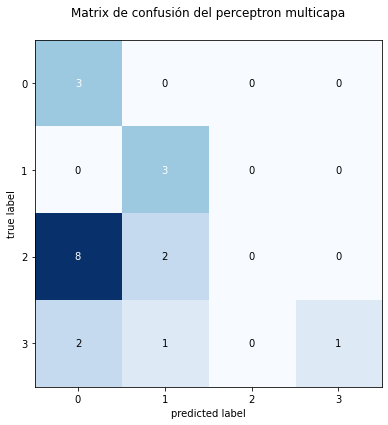

In [ ]:
y_pred = MLP_clf.predict(X_test)
matriz = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat=matriz, figsize=(6,6), show_normed=False)
plt.title('Matrix de confusión del perceptron multicapa')
plt.tight_layout()

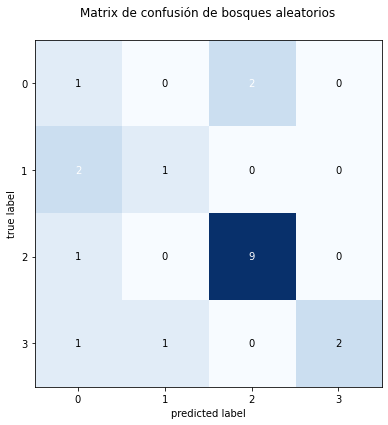

In [ ]:
y_pred = RF_clf.predict(X_test)
matriz = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat=matriz, figsize=(6,6), show_normed=False)
plt.title('Matrix de confusión de bosques aleatorios')
plt.tight_layout()

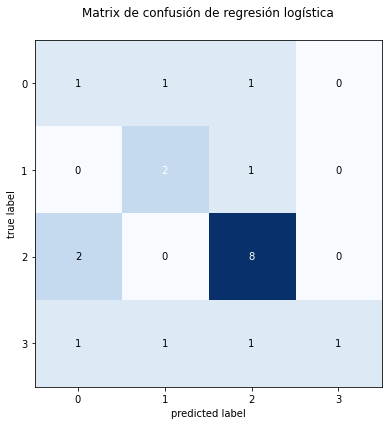

In [ ]:
y_pred = LR_clf.predict(X_test)
matriz = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat=matriz, figsize=(6,6), show_normed=False)
plt.title('Matrix de confusión de regresión logística')
plt.tight_layout()

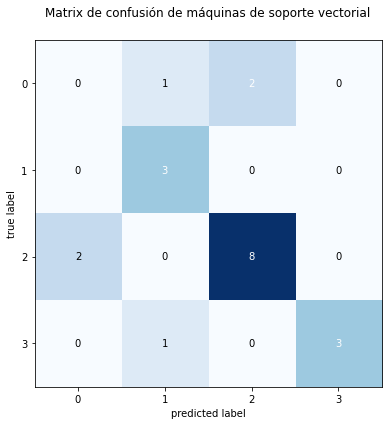

In [ ]:
y_pred = SVM_clf.predict(X_test)
matriz = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat=matriz, figsize=(6,6), show_normed=False)
plt.title('Matrix de confusión de máquinas de soporte vectorial')
plt.tight_layout()

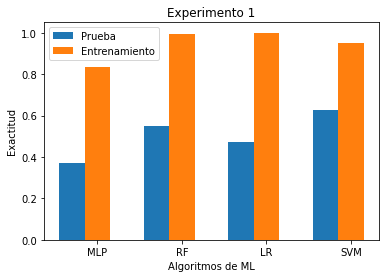

In [ ]:
# prueba = [0.37, 0.55, 0.4699999999999999, 0.6250000000000001]
# entrenamiento = [0.8355555555555556, 0.9927777777777778, 1.0, 0.9494444444444443]

n_grupos = len(pruebas)
indice_barras = np.arange(n_grupos)
ancho_barra = 0.3

plt.bar(indice_barras, pruebas, width=ancho_barra, label='Prueba')
plt.bar(indice_barras + ancho_barra, entrenamientos, width=ancho_barra, label='Entrenamiento')
plt.legend(loc='best')
plt.xticks(indice_barras + ancho_barra, ('MLP', 'RF', 'LR', 'SVM'))

plt.ylabel('Exactitud')
plt.xlabel('Algoritmos de ML')
plt.title('Experimento 1')

plt.show()